In [1]:
import pandas as pd

df = pd.read_csv("data/raw/train.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
#Eliminar columnas relevantes
df = df.drop(columns=["Id"])

# Separar columnas por tipo
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice")
cat_cols = df.select_dtypes(include=["object"]).columns

#Tratamiento de valores nulos
# Numéricas: mediana
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categóricas: "Missing"
for col in cat_cols:
    df[col] = df[col].fillna("Missing")

#One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.shape

(1460, 261)

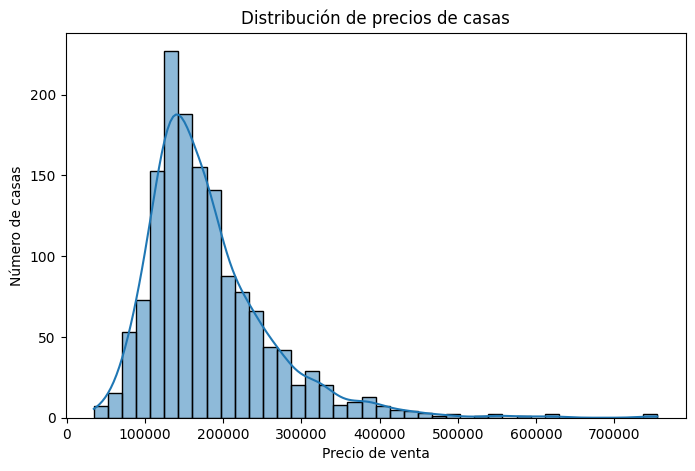

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True, bins=40)
plt.title("Distribución de precios de casas")
plt.xlabel("Precio de venta")
plt.ylabel("Número de casas")
plt.show()

In [9]:
# Correlación con SalePrice
corr = df_encoded.corr()["SalePrice"].sort_values(ascending=False)
print(corr.head(10))   # Top 10 más correlacionadas
print(corr.tail(10))   # 10 menos correlacionadas

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
MSZoning_RM           -0.288065
HeatingQC_TA          -0.312677
Foundation_CBlock     -0.343263
GarageType_Detchd     -0.354141
MasVnrType_Missing    -0.367456
GarageFinish_Unf      -0.410608
BsmtQual_TA           -0.452394
FireplaceQu_Missing   -0.471908
KitchenQual_TA        -0.519298
ExterQual_TA          -0.589044
Name: SalePrice, dtype: float64


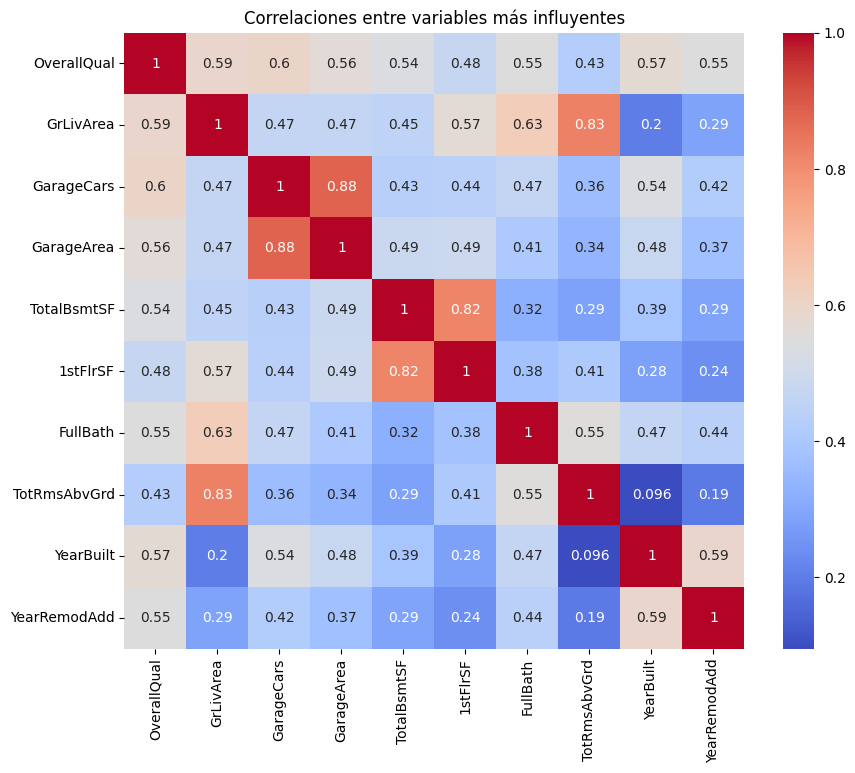

In [10]:
top_corr_features = corr.index[1:11]  # quitamos SalePrice
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables más influyentes")
plt.show()

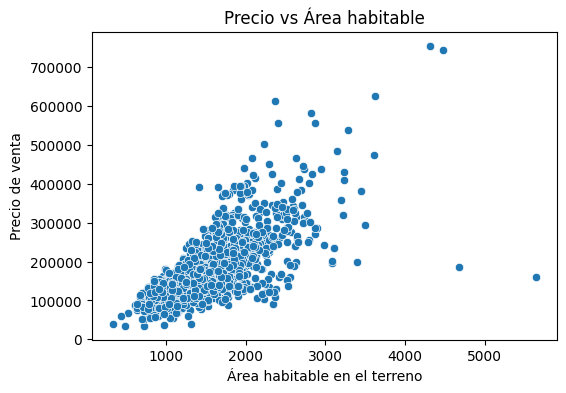

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("Precio vs Área habitable")
plt.xlabel("Área habitable en el terreno")
plt.ylabel("Precio de venta")
plt.show()